In [3]:
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit_textbook.widgets import plot_bloch_vector_spherical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


import pickle

%matplotlib inline


# Create your circuit below


In [61]:
n = 4
circuit = QuantumCircuit(n)
circuit.h(range(n))
for i in range(n):
    circuit.ry(Parameter('c_'+str(i)), i)

for i in range(int(n/2)):
    circuit.crz(Parameter('s_'+str(i)+str(int(n/2))), i, int(n/2))
    circuit.crz(Parameter('s_'+str(i)+str(int(n/2)+1)), i, int(n/2)+1)


for i in range(n):
    circuit.rx(Parameter('theta_'+str(i)), i)


print(circuit_drawer(circuit, output="latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_0})} & \ctrl{2} & \ctrl{3} & \gate{\mathrm{R_X}\,(\mathrm{theta_0})} & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_1})} & \qw & \qw & \ctrl{1} & \ctrl{2} & \gate{\mathrm{R_X}\,(\mathrm{theta_1})} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_2})} & \gate{\mathrm{R_Z}\,(\mathrm{s_02})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_12})} & \qw & \gate{\mathrm{R_X}\,(\mathrm{theta_2})} & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_3})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_03})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_13}

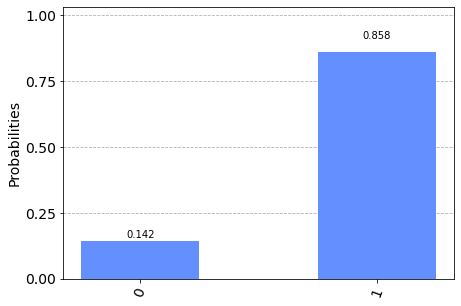

In [31]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.ry(np.pi/4, 0)
circuit.measure_all()
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(circuit, backend), shots=1024)
result = job.result()
counts=result.get_counts(circuit)
plot_histogram(counts)


### The following segment will output the latex code you need to insert into your latex document. Make sure that the imports are done correctly!


```
(2,
[23, 47, 25, 11],
{(0, 2): -6,
(0, 3): -4,
(1, 2): -13,
(1, 3): -6})
```

In [56]:
data = [(2,
[23, 47, 25, 11],
{(0, 2): -6,
(0, 3): -4,
(1, 2): -13,
(1, 3): -6})]

values = []
for row in data:
    values.append(
        np.concatenate([row[1],list(row[2].values())])
        )

scaler = MinMaxScaler((-np.pi/4,np.pi/4))
scaled_data = scaler.fit_transform(values[0].reshape(-1, 1))

scaled_data

array([[ 0.15707963],
       [ 0.78539816],
       [ 0.20943951],
       [-0.15707963],
       [-0.60213859],
       [-0.54977871],
       [-0.78539816],
       [-0.60213859]])

In [57]:
circuit = QuantumCircuit(4)
circuit.h(range(4))
circuit.ry(-0.15707963, 0)
circuit.ry(-0.78539816, 1)
circuit.ry(-0.20943951, 2)
circuit.ry(0.15707963, 3)
circuit.crz(-0.60213859, 0, 2)
circuit.crz(-0.54977871, 0, 3)
circuit.crz(-0.78539816, 1, 2)
circuit.crz(-0.60213859, 1, 3)

print(circuit_drawer(circuit, output="latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{\frac{-\pi}{20}})} & \ctrl{2} & \ctrl{3} & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{\frac{-\pi}{4}})} & \qw & \qw & \ctrl{1} & \ctrl{2} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{\frac{-\pi}{15}})} & \gate{\mathrm{R_Z}\,(\mathrm{-0.6021})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{\frac{-\pi}{4}})} & \qw & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{\frac{\pi}{20}})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{-0.5498})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{-0.6021})} & \qw & \qw\\
\\ }}
\end{document}


In [24]:
state = Statevector.from_instruction(QuantumCircuit(1))
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_0.svg', bbox_inches='tight', pad_inches=0)

In [16]:
qc = QuantumCircuit(1)
qc.x(0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_1.svg', bbox_inches='tight', pad_inches=0)

In [23]:
qc = QuantumCircuit(1)
qc.h(0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_h.svg', bbox_inches='tight', pad_inches=0)

In [21]:
qc = QuantumCircuit(4)
qc.h(range(4))
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_h_multiqubit.svg', bbox_inches='tight', pad_inches=0)

In [4]:
qc = QuantumCircuit(1)
qc.h(range(1))
qc.ry(0.5, 0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_ry_0_5.svg', bbox_inches='tight', pad_inches=0)
qc = QuantumCircuit(1)
qc.h(range(1))
qc.ry(-0.5, 0)
state = Statevector.from_instruction(qc)
fig = plot_state_qsphere(state)
fig.savefig('../thesis/Appendices/Q_Sphere_State_ry_-0_5.svg', bbox_inches='tight', pad_inches=0)

#### Use this to generate histograms

In [7]:
counts = {}
counts[0] = 547
counts[1] = 987

fig = plot_histogram(counts)
fig.savefig('../thesis/Appendices/example_histogram.svg', type="svg")

/tmp/ipykernel_685/2013565266.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../thesis/Appendices/example_histogram.svg', type="svg")


In [9]:
circuit = QuantumCircuit(1)
circuit.ry(1.8608, 0)
backend = Aer.get_backend('qasm_simulator')

circuit.measure_all()
job = backend.run(transpile(circuit, backend), shots=5000000)

result = job.result()
counts=result.get_counts(circuit)
fig = plot_histogram(counts)

fig.savefig('../thesis/Appendices/calculated_circuit_histogram.svg', type="svg")

/tmp/ipykernel_970/890443297.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../thesis/Appendices/calculated_circuit_histogram.svg', type="svg")


# Graphs from MQO circuit results

In [4]:
#get best ml weight for circuit
#load weights
weights_path = "mqo/runs/experiments/optimizer_hyperparameters/amsgrad_final.p"
data = pickle.load(open(weights_path, "rb"))[0]
results = data['results'][0]
best_index = results['scoreTesting'].index(max(results['scoreTesting']))
rxweight = results['finalWeights'][best_index][0]

In [88]:
#circuit with ml trained component
circuit = QuantumCircuit(4)
circuit.h(range(4))
for i in range(4):
    circuit.ry(Parameter('c_'+str(i)), i)
for i in range(2):
    for j in range(2,4,1):
        circuit.crz(Parameter('s_' + str(i)+str(j)), i, j)
circuit.rx(np.pi/4, range(4))
print(circuit_drawer(circuit, output="latex_source"))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_0})} & \ctrl{2} & \ctrl{3} & \gate{\mathrm{R_X}\,(\mathrm{\frac{\pi}{4}})} & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_1})} & \qw & \qw & \ctrl{1} & \ctrl{2} & \gate{\mathrm{R_X}\,(\mathrm{\frac{\pi}{4}})} & \qw & \qw\\
	 	\nghost{{q}_{2} :  } & \lstick{{q}_{2} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_2})} & \gate{\mathrm{R_Z}\,(\mathrm{s_02})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_12})} & \qw & \gate{\mathrm{R_X}\,(\mathrm{\frac{\pi}{4}})} & \qw & \qw\\
	 	\nghost{{q}_{3} :  } & \lstick{{q}_{3} :  } & \gate{\mathrm{H}} & \gate{\mathrm{R_Y}\,(\mathrm{c_3})} & \qw & \gate{\mathrm{R_Z}\,(\mathrm{s_03})} & \qw & \gate{\mathrm{R_

In [42]:
results_ml = "mqo/runs/experiments/final_runs/static_ml_solver.p"
results_static = "mqo/runs/experiments/final_runs/static_solver.p"
data_ml = pickle.load(open(results_ml, "rb"))
data_static = pickle.load(open(results_static, "rb"))

In [18]:
ml_simulator_filtered_accuracy = data_ml['accuracy_simulator']
ml_simulator_parity_accuracy = data_ml['accuracy_parity_simulator']
ml_real_hw_filtered_accuracy = data_ml['accuracy_real_hardware']
ml_real_hw_parity_accuracy = data_ml['accuracy_parity_real_hardware']


In [20]:
stc_simulator_accuracy = data_static['accuracy_simulator']
stc_real_hw_accuracy = data_static['accuracy_real_hardware']

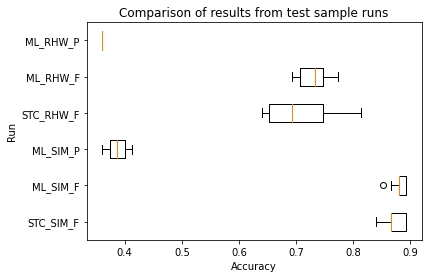

In [36]:
boxplot_data = [stc_simulator_accuracy, ml_simulator_filtered_accuracy, ml_simulator_parity_accuracy, stc_real_hw_accuracy, ml_real_hw_filtered_accuracy, ml_real_hw_parity_accuracy]
fig, ax = plt.subplots()
ax.set_title("Comparison of results from test sample runs")
ax.boxplot(boxplot_data, vert=False, labels=['STC_SIM_F', 'ML_SIM_F', 'ML_SIM_P', 'STC_RHW_F', 'ML_RHW_F', 'ML_RHW_P'])
ax.set_xlabel("Accuracy")
ax.set_ylabel("Run")
plt.show()

In [3]:
amsgrad_final_training = "mqo/runs/experiments/optimizer_hyperparameters/amsgrad_final.p"
ml_final_training = pickle.load(open(amsgrad_final_training, "rb"))

In [4]:
training_scores = ml_final_training[0]['results'][0]['scoreTraining']
testing_scores = ml_final_training[0]['results'][0]['scoreTesting']
final_weights = np.array(ml_final_training[0]['results'][0]['finalWeights']).flatten()

In [53]:
max(testing_scores)

0.4533333333333333

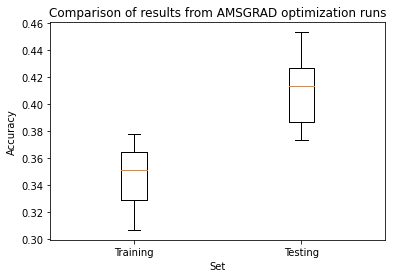

In [6]:
boxplot_data = [training_scores, testing_scores]
fig, ax = plt.subplots()
ax.set_title("Comparison of results from AMSGRAD optimization runs")
ax.boxplot(boxplot_data, labels=['Training', 'Testing'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Set")
plt.show()
fig.savefig('../thesis/Appendices/final_amsgrad_training_boxplot.svg')

In [67]:
labels = [1,10,25,50,75,100,150,200,350,500,1000,1500,2000,10000]
labels = [str(a) for a in labels]
distances = [[],[],[],[]]
distances[0] = [29.94,45.84,56.5,64.14,68.92,70.3,74.68,76.62,78.4,80.3,82.3,84.02,84.7,86.08]
distances[1] = [25.32,27.12,25.34,24.28,21.9,21.18,19.06,17.24,16.16,15.2,13.76,12.86,12.34,11.4]
distances[2] = [23.22,16.4,11.72,8.22,6.58,6.06,4.66,5,4.28,3.72,3.52,2.7,2.7,2.42]
distances[3] = [21.52,10.64,6.44,3.36,2.6,2.46,1.6,1.14,1.16,0.78,0.42,0.42,0.26,0.1]
growth_rate = []
for i in range(len(distances[0])):
    if i == 0:
        growth_rate.append(np.inf)
    else:
        growth_rate.append(distances[0][i]/distances[0][i-1])


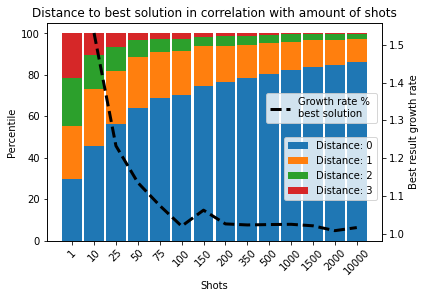

In [85]:
fig, ax = plt.subplots()
width = 0.9
ax.bar(labels, distances[0], width, label='Distance: ' +str(0))
ax.bar(labels, distances[1], width, label='Distance: ' +str(1), bottom=distances[0])
ax.bar(labels, distances[2], width, label='Distance: ' +str(2), bottom=np.add(distances[0],distances[1]))
ax.bar(labels, distances[3], width, label='Distance: ' +str(3), bottom=np.add(np.add(distances[0],distances[1]),distances[2]))
plt.xticks(rotation=45)
ax2 = ax.twinx()
ax2.plot(growth_rate, label='Growth rate % \nbest solution', color = 'black', linewidth=3, linestyle='dashed')
ax2.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.7))
ax.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax.set_title('Distance to best solution in correlation with amount of shots')
ax.set_xlabel('Shots')
ax.set_ylabel('Percentile')
ax2.set_ylabel('Best result growth rate')
plt.show()
fig.savefig('../thesis/Appendices/comparison_shots_to_solution.svg')

['0.830078125', '0.8642578125', '0.85546875', '0.861328125', '0.8544921875', '0.861328125', '0.8388671875', '0.8623046875', '0.8447265625', '0.8408203125', '0.84765625', '0.8740234375', '0.8544921875']


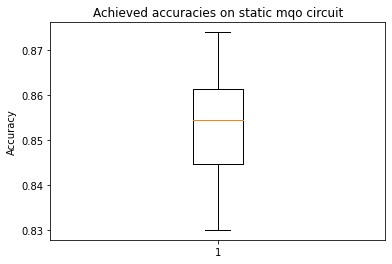

In [9]:
import csv

og_path = "mqo/runs/functionality_analysis/"
max_iter = 13
accuracies = []
for i in range(1,max_iter+1):
    with open(og_path+"iteration_"+str(i)+"_accuracy.csv", newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        for row in reader:
            accuracies.append(row[0])
print(accuracies)

fig, ax = plt.subplots()
ax.set_title("Achieved accuracies on static mqo circuit")
ax.boxplot(np.array(accuracies, dtype='float64'))
ax.set_ylabel("Accuracy")
plt.show()
fig.savefig('../thesis/Appendices/static_circuit_accuracies_boxplot.svg')

In [10]:
path = 'mqo/runs/experiments/final_runs/'
savename = 'all_runs_done_accuracies.p'
final_evaluation_data = pickle.load(open(path+savename, "rb"))

In [11]:

static = {'simulator_acc': final_evaluation_data['static_simulator_filtered_accuracy'],
         'simulator_acc_dist': final_evaluation_data['static_simulator_filtered_distances'],
         'real_hw_acc': final_evaluation_data['static_real_hw_filtered_accuracy'],
         'real_hw_dist': final_evaluation_data['static_real_hw_filtered_distances']}

trained = {'simulator_acc_filtered': final_evaluation_data['ml_simulator_filtered_accuracy'],
         'simulator_acc_filtered_dist': final_evaluation_data['ml_simulator_filtered_distances'],
         'simulator_acc_parity': final_evaluation_data['ml_simulator_parity_accuracy'],
         'simulator_acc_parity_dist': final_evaluation_data['ml_simulator_parity_distances'],
         'real_hw_acc_filtered': final_evaluation_data['ml_real_hw_filtered_accuracy'],
         'real_hw_acc_filtered_dist': final_evaluation_data['ml_real_hw_filtered_distances'],
         'real_hw_acc_parity': final_evaluation_data['ml_real_hw_parity_accuracy'],
         'real_hw_acc_parity_dist': final_evaluation_data['ml_real_hw_parity_distances']}

### Recheck data after doing all runs again

In [12]:
path = "mqo/runs/data/problems_with_solutions.p"
data = pickle.load(open(path, "rb"))
y_test = data['y_test']
y_test_ranking = data['y_test_ranked']

In [13]:
path_of_counts_final_run = "mqo/runs/experiments/final_runs/counts_of_runs.p"
all_counts = pickle.load(open(path_of_counts_final_run, "rb"))
all_counts.keys()

dict_keys(['ml_simulator_counts', 'ml_real_hw_counts', 'static_simulation_counts', 'static_real_hw_counts'])

In [14]:
ml_counts_simulator = all_counts['ml_simulator_counts']
ml_counts_real_hw =  all_counts['ml_real_hw_counts']

noml_counts_simulator = all_counts['static_simulation_counts']
noml_counts_real_hw = all_counts['static_real_hw_counts']

### Accuracy comparison

In [5]:
from sklearn.metrics import accuracy_score

def filter_counts(counts, keys):
    new_counts = {}
    for key in keys:
        new_counts[key] = counts.get(key, 0)
    return new_counts

def counts_to_label_array(run, keys):
    result = np.zeros(len(keys))
    for i, key in enumerate(keys):
        result[i] = run.get(key, 0)
    return result

def score_results(results, solutions):
    return accuracy_score(results, solutions)

def calculate_parity_accuracy(runs, solution, amount_of_labels):
    labels = []
    for run in runs:
        labels.append([int(max(counts, key=counts.get), 2)%amount_of_labels for counts in run])
    accuracy = []
    for label in labels:
        accuracy.append(accuracy_score(label, y_test))
    return accuracy

def calculate_filtered_accuracy(runs, solution):
    keys = ["0101", "1001", "0110", "1010"]
    filtered_runs = []
    for run in runs:
        filtered_runs.append([filter_counts(counts, keys) for counts in run])
    accuracy = []
    for runs in filtered_runs:
        labels = []
        for counts in runs:
            label_array = list(counts_to_label_array(counts, keys))
            max_value = max(label_array)
            labels.append(label_array.index(max_value))
        accuracy.append(accuracy_score(labels, y_test))
    return accuracy

In [15]:
noml_counts_real_hw = np.array(noml_counts_real_hw).reshape(13,75)
ml_counts_real_hw = np.array(ml_counts_real_hw).reshape(13,75)

In [16]:
noml_sim_filtered_acc = calculate_filtered_accuracy(noml_counts_simulator, y_test)
noml_sim_parity_acc = calculate_parity_accuracy(noml_counts_simulator, y_test, 4)
noml_rhw_filtered_acc = calculate_filtered_accuracy(noml_counts_real_hw, y_test)
noml_rhw_parity_acc = calculate_parity_accuracy(noml_counts_real_hw, y_test, 4)
ml_sim_filtered_acc = calculate_filtered_accuracy(ml_counts_simulator, y_test)
ml_sim_parity_acc = calculate_parity_accuracy(ml_counts_simulator, y_test, 4)
ml_rhw_filtered_acc = calculate_filtered_accuracy(ml_counts_real_hw, y_test)
ml_rhw_parity_acc = calculate_parity_accuracy(ml_counts_real_hw, y_test, 4)

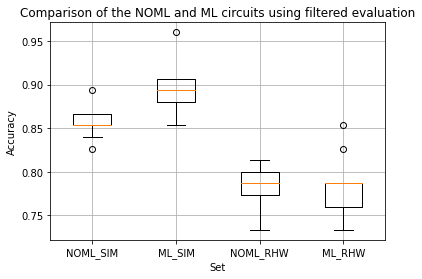

In [17]:
boxplot_data = [noml_sim_filtered_acc, ml_sim_filtered_acc, noml_rhw_filtered_acc, ml_rhw_filtered_acc]
fig, ax = plt.subplots()
ax.set_title("Comparison of the NOML and ML circuits using filtered evaluation")
ax.boxplot(boxplot_data, labels=['NOML_SIM', 'ML_SIM', 'NOML_RHW', 'ML_RHW'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Set")
plt.grid()
plt.show()
fig.savefig('../thesis/Appendices/comparison_ml_noml_circuit_filtered_acc.svg')

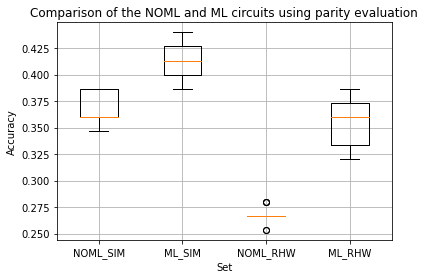

In [18]:
boxplot_data = [noml_sim_parity_acc, ml_sim_parity_acc, noml_rhw_parity_acc, ml_rhw_parity_acc]
fig, ax = plt.subplots()
ax.set_title("Comparison of the NOML and ML circuits using parity evaluation")
ax.boxplot(boxplot_data, labels=['NOML_SIM', 'ML_SIM', 'NOML_RHW', 'ML_RHW'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Set")
plt.grid()
plt.show()
fig.savefig('../thesis/Appendices/comparison_ml_noml_circuit_parity_acc.svg')

### Distance comparison

In [196]:
def counts_to_label_dict(run, keys):
    result = {}
    for i, key in enumerate(keys):
        result[i] = run.get(key, 0)
    return result

def calculate_filtered_distance(results, solutions, amount_of_labels, reverse=True, keys = ["0101", "1001", "0110", "1010"]):
    distances = []
    keys = ["0101", "1001", "0110", "1010"]
    filtered_runs = []
    for run in results:
        filtered_runs.append([filter_counts(counts, keys) for counts in run])
    for run in filtered_runs:
        temp_dist = np.zeros(amount_of_labels)
        for r,s in zip(run,solutions):
            labels = counts_to_label_dict(r, keys)
            sorted_labels = list({k: v for k, v in sorted(labels.items(), key=lambda item: item[1], reverse=reverse)}.keys())
            sorted_labels = np.array(sorted_labels)
            distance = np.where(s == sorted_labels)[0]
            if len(distance) == 0:
                continue
            else:
                temp_dist[distance] += 1
        distances.append(temp_dist)
    return distances

In [215]:
noml_sim_filtered_dist = calculate_filtered_distance(noml_counts_simulator, y_test, 4)
noml_real_hw_filtered_dist = calculate_filtered_distance(noml_counts_real_hw, y_test, 4)
ml_sim_filtered_dist = calculate_filtered_distance(ml_counts_simulator, y_test, 4)
ml_real_hw_filtered_dist = calculate_filtered_distance(ml_counts_real_hw, y_test, 4)

In [216]:
total_elements = np.sum(noml_sim_filtered_dist[0])

In [237]:
noml_sim_filtered_dist_boxplot = [np.array(noml_sim_filtered_dist)[:,0],
                                np.array(noml_sim_filtered_dist)[:,1],
                                np.array(noml_sim_filtered_dist)[:,2],
                                np.array(noml_sim_filtered_dist)[:,3]]

noml_real_hw_filtered_dist_boxplot = [np.array(noml_real_hw_filtered_dist)[:,0],
                                np.array(noml_real_hw_filtered_dist)[:,1],
                                np.array(noml_real_hw_filtered_dist)[:,2],
                                np.array(noml_real_hw_filtered_dist)[:,3]]

ml_sim_filtered_dist_boxplot = [np.array(ml_sim_filtered_dist)[:,0],
                                np.array(ml_sim_filtered_dist)[:,1],
                                np.array(ml_sim_filtered_dist)[:,2],
                                np.array(ml_sim_filtered_dist)[:,3]]

ml_real_hw_filtered_dist_boxplot = [np.array(ml_real_hw_filtered_dist)[:,0],
                                np.array(ml_real_hw_filtered_dist)[:,1],
                                np.array(ml_real_hw_filtered_dist)[:,2],
                                np.array(ml_real_hw_filtered_dist)[:,3]]

In [238]:
noml_sim_filtered_dist_boxplot = np.divide(noml_sim_filtered_dist_boxplot, total_elements/100)
noml_real_hw_filtered_dist_boxplot = np.divide(noml_real_hw_filtered_dist_boxplot, total_elements/100)
ml_sim_filtered_dist_boxplot = np.divide(ml_sim_filtered_dist_boxplot, total_elements/100)
ml_real_hw_filtered_dist_boxplot = np.divide(ml_real_hw_filtered_dist_boxplot, total_elements/100)


In [249]:
noml_sim_filtered_dist_boxplot.reshape(4,13)

array([[85.33333333, 85.33333333, 85.33333333, 85.33333333, 86.66666667,
        86.66666667, 84.        , 85.33333333, 85.33333333, 84.        ,
        86.66666667, 82.66666667, 89.33333333],
       [13.33333333, 12.        , 14.66666667, 13.33333333, 13.33333333,
        12.        , 16.        , 13.33333333, 14.66666667, 16.        ,
        13.33333333, 17.33333333,  9.33333333],
       [ 1.33333333,  2.66666667,  0.        ,  1.33333333,  0.        ,
         1.33333333,  0.        ,  1.33333333,  0.        ,  0.        ,
         0.        ,  0.        ,  1.33333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

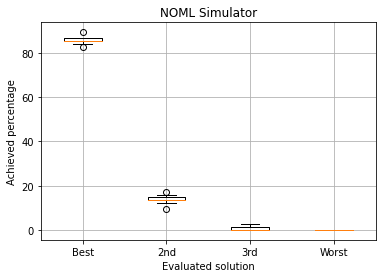

In [265]:
labels = ['Best', '2nd', '3rd', 'Worst']
fig, axs = plt.subplots()
axs.boxplot([a for a in noml_sim_filtered_dist_boxplot], labels=labels)
axs.grid()
axs.set_title("NOML Simulator")
axs.set_ylabel('Achieved percentage')
axs.set_xlabel('Evaluated solution')
plt.show()
fig.savefig('../thesis/Appendices/comparison_noml_sim_f_distance.svg')

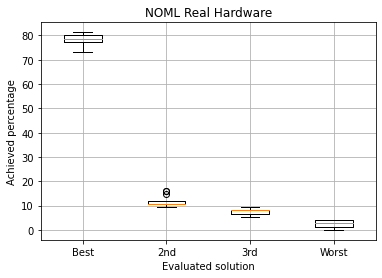

In [266]:
labels = ['Best', '2nd', '3rd', 'Worst']
fig, axs = plt.subplots()
axs.boxplot([a for a in noml_real_hw_filtered_dist_boxplot], labels=labels)
axs.grid()
axs.set_title("NOML Real Hardware")
axs.set_ylabel('Achieved percentage')
axs.set_xlabel('Evaluated solution')
plt.show()
fig.savefig('../thesis/Appendices/comparison_noml_rhw_f_distance.svg')

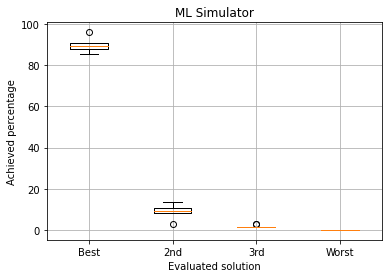

In [267]:
labels = ['Best', '2nd', '3rd', 'Worst']
fig, axs = plt.subplots()
axs.boxplot([a for a in ml_sim_filtered_dist_boxplot], labels=labels)
axs.grid()
axs.set_title("ML Simulator")
axs.set_ylabel('Achieved percentage')
axs.set_xlabel('Evaluated solution')
plt.show()
fig.savefig('../thesis/Appendices/comparison_ml_sim_distanec.svg')

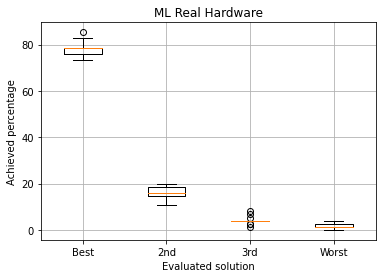

In [268]:
labels = ['Best', '2nd', '3rd', 'Worst']
fig, axs = plt.subplots()
axs.boxplot([a for a in ml_real_hw_filtered_dist_boxplot], labels=labels)
axs.grid()
axs.set_title("ML Real Hardware")
axs.set_ylabel('Achieved percentage')
axs.set_xlabel('Evaluated solution')
plt.show()
fig.savefig('../thesis/Appendices/comparison_ml_rhw_distanec.svg')

In [5]:
path = 'mqo/runs/experiments/final_runs/'
savename = '1000_runs_done_accuracies.p'
blind_runs = pickle.load(open(path+savename, "rb"))
blind_runs.keys()

dict_keys(['static_simulator_filtered_accuracy', 'static_simulator_filtered_distances', 'static_real_hw_filtered_accuracy', 'static_real_hw_filtered_distances', 'ml_simulator_filtered_accuracy', 'ml_simulator_parity_accuracy', 'ml_simulator_filtered_distances', 'ml_simulator_parity_distances', 'ml_real_hw_filtered_accuracy', 'ml_real_hw_parity_accuracy', 'ml_real_hw_filtered_distances', 'ml_real_hw_parity_distances'])

In [58]:
noml_sim = blind_runs['static_simulator_filtered_accuracy']*100
noml_rhw = blind_runs['static_real_hw_filtered_accuracy']*100
ml_sim = blind_runs['ml_simulator_filtered_accuracy']*100
ml_rhw = blind_runs['ml_real_hw_filtered_accuracy']*100
ml_par_sim = blind_runs['ml_simulator_parity_accuracy']*100
ml_par_rhw = blind_runs['ml_real_hw_parity_accuracy']*100

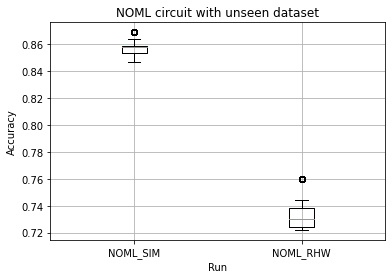

In [62]:
boxplot_data = [noml_sim, noml_rhw]
fig, ax = plt.subplots()
ax.set_title("NOML Circuit With Unseen Dataset")
ax.boxplot(boxplot_data, labels=['NOML_SIM', 'NOML_RHW'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Run")
ax.grid()
plt.yscale('linear')
plt.show()
fig.savefig('../thesis/Appendices/blind_run_noml_circuit_acc.svg')

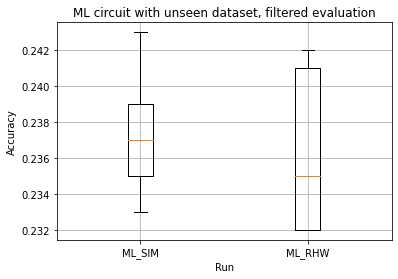

In [64]:
boxplot_data = [ml_sim, ml_rhw]
fig, ax = plt.subplots()
ax.set_title("ML Circuit With Unseen Dataset, Filtered Evaluation")
ax.boxplot(boxplot_data, labels=['ML_SIM', 'ML_RHW'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Run")
ax.grid()
plt.yscale('linear')
plt.show()
fig.savefig('../thesis/Appendices/blind_run_ml_circuit_f_acc.svg')

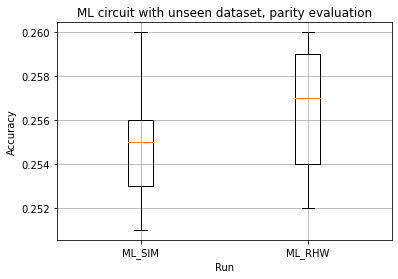

In [206]:
boxplot_data = [ml_par_sim, ml_par_rhw]
fig, ax = plt.subplots()
ax.set_title("ML Circuit With Unseen Dataset, Parity Evaluation")
ax.boxplot(boxplot_data, labels=['ML_SIM', 'ML_RHW'])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Run")
ax.grid()
plt.yscale('linear')
plt.show()
fig.savefig('../thesis/Appendices/blind_run_ml_circuit_p_acc.svg')

In [5]:
blind_runs['static_real_hw_filtered_distances']

[{0: 754, 1: 180, 3: 12, 2: 54},
 {0: 748, 1: 185, 2: 56, 3: 11},
 {0: 736, 1: 180, 3: 11, 2: 73},
 {0: 694, 1: 221, 2: 71, 3: 14},
 {0: 668, 1: 248, 2: 69, 3: 15},
 {1: 232, 0: 680, 2: 79, 3: 9},
 {0: 632, 1: 267, 2: 83, 3: 18},
 {0: 660, 1: 243, 2: 85, 3: 12},
 {0: 669, 1: 238, 2: 81, 3: 12},
 {1: 226, 0: 689, 3: 13, 2: 72},
 {0: 648, 1: 255, 2: 79, 3: 18},
 {0: 710, 1: 209, 3: 22, 2: 59},
 {0: 717, 1: 213, 2: 59, 3: 11}]

In [6]:
noml_dist_sim = [list(a.values()) for a in blind_runs['static_simulator_filtered_distances']]
noml_dist_rhw = [list(a.values()) for a in blind_runs['static_real_hw_filtered_distances']]
ml_dist_sim = [list(a.values()) for a in blind_runs['ml_simulator_filtered_distances']]
ml_dist_rhw = [list(a.values()) for a in blind_runs['ml_real_hw_filtered_distances']]
total = sum(blind_runs['static_simulator_filtered_distances'][0].values())

In [7]:
noml_dist_sim_boxplot = [np.array(noml_dist_sim)[:,0],
                         np.array(noml_dist_sim)[:,1],
                         np.array(noml_dist_sim)[:,2],
                         np.array(noml_dist_sim)[:,3]]

noml_dist_rhw_boxplot = [np.array(noml_dist_rhw)[:,0],
                         np.array(noml_dist_rhw)[:,1],
                         np.array(noml_dist_rhw)[:,2],
                         np.array(noml_dist_rhw)[:,3]]

ml_dist_sim_boxplot = [np.array(ml_dist_sim)[:,0],
                         np.array(ml_dist_sim)[:,1],
                         np.array(ml_dist_sim)[:,2],
                         np.array(ml_dist_sim)[:,3]]

ml_dist_rhw_boxplot = [np.array(ml_dist_rhw)[:,0],
                         np.array(ml_dist_rhw)[:,1],
                         np.array(ml_dist_rhw)[:,2],
                         np.array(ml_dist_rhw)[:,3]]

In [8]:
noml_dist_sim_boxplot = np.divide(noml_dist_sim_boxplot,1000/100)
noml_dist_rhw_boxplot = np.divide(noml_dist_rhw_boxplot,1000/100)
ml_dist_sim_boxplot = np.divide(ml_dist_sim_boxplot,1000/100)
ml_dist_rhw_boxplot = np.divide(ml_dist_rhw_boxplot,1000/100)

In [24]:
noml_dist_sim_boxplot

array([[85.8, 85.5, 85.9, 86.4, 86.9, 85.9, 85.3, 85.4, 86.2, 84.7, 85.9,
        85.7, 85.4],
       [12.3, 12.2,  2.1, 12. , 11.1, 11.9, 12.5, 12.7, 11.7, 13.2, 11.6,
         1.8, 12.7],
       [ 1.7,  2.1, 11.8,  1.5,  0.2,  0.3,  2.1,  1.8,  1.8,  0.2,  0.2,
        12.3,  0.2],
       [ 0.2,  0.2,  0.2,  0.1,  1.8,  1.9,  0.1,  0.1,  0.3,  1.9,  2.3,
         0.2,  1.7]])

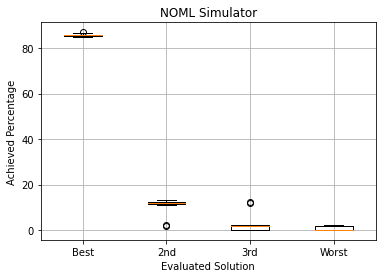

In [12]:
fig, ax = plt.subplots()
ax.set_title("NOML Simulator")
ax.boxplot([a for a in noml_dist_sim_boxplot], labels=['Best', '2nd', '3rd', 'Worst'])
ax.set_ylabel("Achieved Percentage")
ax.set_xlabel("Evaluated Solution")
ax.grid()
plt.yscale('linear')
plt.show()
fig.savefig('../thesis/Appendices/blind_run_noml_sim.svg')

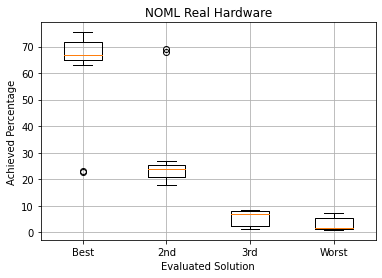

In [13]:
fig, ax = plt.subplots()
ax.set_title("NOML Real Hardware")
ax.boxplot([a for a in noml_dist_rhw_boxplot], labels=['Best', '2nd', '3rd', 'Worst'])
ax.set_ylabel("Achieved Percentage")
ax.set_xlabel("Evaluated Solution")
ax.grid()
plt.yscale('linear')
plt.show()
fig.savefig('../thesis/Appendices/blind_run_noml_rhw.svg')

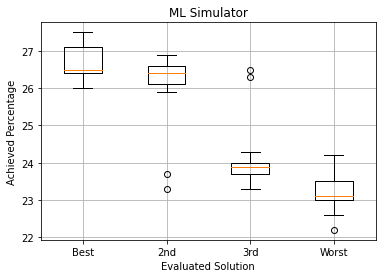

In [14]:
fig, ax = plt.subplots()
ax.set_title("ML Simulator")
ax.boxplot([a for a in ml_dist_sim_boxplot], labels=['Best', '2nd', '3rd', 'Worst'])
ax.set_ylabel("Achieved Percentage")
ax.set_xlabel("Evaluated Solution")
ax.grid()
plt.yscale('linear')
plt.show()
fig.savefig('../thesis/Appendices/blind_run_ml_sim.svg')

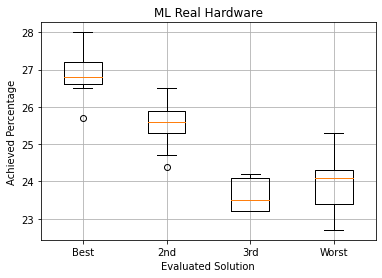

In [15]:
fig, ax = plt.subplots()
ax.set_title("ML Real Hardware")
ax.boxplot([a for a in ml_dist_rhw_boxplot], labels=['Best', '2nd', '3rd', 'Worst'])
ax.set_ylabel("Achieved Percentage")
ax.set_xlabel("Evaluated Solution")
ax.grid()
plt.yscale('linear')
plt.show()
fig.savefig('../thesis/Appendices/blind_run_ml_rhw.svg')